In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784')

In [2]:
type(dataset),type(dataset["data"]),type(dataset["target"])

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [3]:
X,y = dataset["data"],dataset["target"]

In [4]:
X = X / 255

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
y

array([['5', '0', '4', ..., '4', '5', '6']], dtype=object)

In [20]:
digits = 10
examples = y.shape[1]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [21]:
Y_new.shape

(10, 70000)

In [22]:
Y_new[:,100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [23]:
y[0,100]

'5'

In [24]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

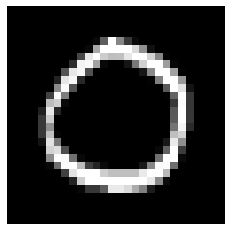

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [27]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [29]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [32]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [30]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  5.925224124289149
Epoch 100 cost:  0.7838522489924591
Epoch 200 cost:  0.5862622762959397
Epoch 300 cost:  0.5007491535407831
Epoch 400 cost:  0.44988063809109996
Epoch 500 cost:  0.4148064550507508
Epoch 600 cost:  0.3884169268072081
Epoch 700 cost:  0.36741771418150504
Epoch 800 cost:  0.3500647342203546
Epoch 900 cost:  0.3353408496295651
Epoch 1000 cost:  0.32258866558678606
Epoch 1100 cost:  0.3113512922232809
Epoch 1200 cost:  0.30130368380013384
Epoch 1300 cost:  0.2922152801685285
Epoch 1400 cost:  0.28392561041707076
Epoch 1500 cost:  0.2763145255912963
Epoch 1600 cost:  0.269283349295984
Epoch 1700 cost:  0.26275129502619804
Epoch 1800 cost:  0.25665318370239537
Epoch 1900 cost:  0.25093634173111456
Final cost: 0.2456100212107764


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 952    0   15    2    1   13   10    2    8    7]
 [   0 1107    4    1    2    1    5    8    8    4]
 [   3    3  932   24    4    3    8   26   11    1]
 [   0    3   15  907    0   41    0   10   28    6]
 [   1    1   11    1  910    4   16    5   12   39]
 [  10    2    3   40    4  765   14    2   26    9]
 [   8    1   12    3   12   14  901    0   13    1]
 [   2    1   12   16    6   12    2  949    9   23]
 [   4   17   24   13    6   31    2    4  850    8]
 [   0    0    4    3   37    8    0   22    9  911]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1010
           1       0.98      0.97      0.97      1140
           2       0.90      0.92      0.91      1015
           3       0.90      0.90      0.90      1010
           4       0.93      0.91      0.92      1000
           5       0.86      0.87      0.87       875
           6       0.94      0.93      0.94       965
           7       0.92      0.92   